<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/Romania_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random

#Set up Map as graph: See AIMA Figure 3.1 page 64
But we making the environment stochastic, by assigning probabilites that the roads are passable.

In [39]:
# Sample Romania map data with custom node positions
romania_map = {
    'graph_dict': {
        'Arad': {'Zerind': 75, 'Timisoara': 118, 'Sibiu': 140},
        'Zerind': {'Arad': 75, 'Oradea': 71},
        'Oradea': {'Zerind': 71, 'Sibiu': 151},
        'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
        'Timisoara': {'Arad': 118, 'Lugoj': 111},
        'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
        'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
        'Drobeta': {'Mehadia': 75, 'Craiova': 120},
        'Craiova': {'Drobeta': 120, 'Pitesti': 138, 'Rimnicu Vilcea': 146},
        'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
        'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
        'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
        'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
        'Giurgiu': {'Bucharest': 90},
        'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
        'Hirsova': {'Urziceni': 98, 'Eforie': 86},
        'Eforie': {'Hirsova': 86},
        'Vaslui': {'Urziceni': 142, 'Iasi': 92},
        'Iasi': {'Vaslui': 92, 'Neamt': 87},
        'Neamt': {'Iasi': 87}
    },
    'locations': {
        'Arad': (91, 492), 'Zerind': (135, 495), 'Oradea': (200, 490), 'Sibiu': (140, 400),
        'Timisoara': (70, 410), 'Lugoj': (100, 360), 'Mehadia': (120, 310), 'Drobeta': (130, 250),
        'Craiova': (220, 200), 'Rimnicu Vilcea': (180, 320), 'Fagaras': (220, 400),
        'Pitesti': (250, 300), 'Bucharest': (350, 200), 'Giurgiu': (370, 150), 'Urziceni': (400, 210),
        'Hirsova': (460, 240), 'Eforie': (475, 150), 'Vaslui': (490, 300), 'Iasi': (470, 350),
        'Neamt': (450, 400)
    }
}

# Add random probabilities to each edge
for city, neighbors in romania_map['graph_dict'].items():
    for neighbor, distance in list(neighbors.items()):  # Iterate over a copy of the items
        probability =round(random.uniform(0.01, 1.0), 2)  # Generate random probability between 0.5 and 1.0
        romania_map['graph_dict'][city][neighbor] = (distance, probability)

In [40]:
node_colors = {node: 'white' for node in romania_map['locations'].keys()}
node_positions = romania_map['locations']
node_label_positions = {k: [v[0], v[1] - 10] for k, v in romania_map['locations'].items()}
edge_weights = {(k, k2): v2 for k, v in romania_map['graph_dict'].items() for k2, v2 in v.items()}

romania_graph_data = {
    'graph_dict': romania_map['graph_dict'],
    'node_colors': node_colors,
    'node_positions': node_positions,
    'node_label_positions': node_label_positions,
    'edge_weights': edge_weights
}

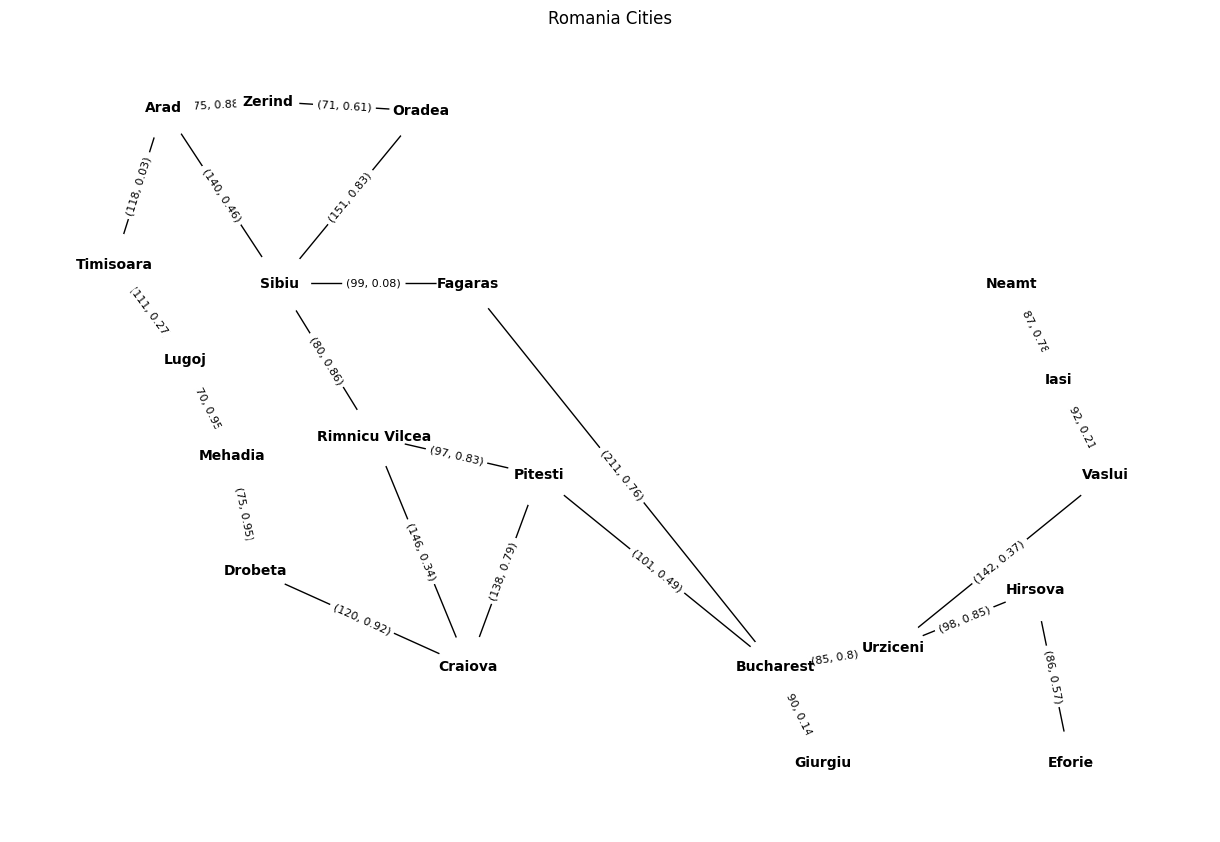

In [41]:
# Create the graph
graph = nx.Graph()
for node, neighbors in romania_graph_data['graph_dict'].items():
    for neighbor, weight in neighbors.items():
        graph.add_edge(node, neighbor, weight=weight)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(graph,
        pos=romania_graph_data['node_positions'],
        with_labels=True,
        node_size=2000,
        node_color=list(romania_graph_data['node_colors'].values()),
        font_size=10,
        font_weight='bold',
        edge_color='black')

# Add edge labels for weights
nx.draw_networkx_edge_labels(
    graph,
    pos=romania_graph_data['node_positions'],
    edge_labels=romania_graph_data['edge_weights'],
    font_size=8
)

plt.title("Romania Cities")
plt.show()


In [42]:
# prompt: Treat the first entry of the tuple for the edges as a distance and give me code for uniform cost search from a starting city to a goal city.

def uniform_cost_search(graph, start, goal):
    """
    Performs uniform cost search on a graph.

    Args:
        graph: A networkx graph representing the map.
        start: The starting city.
        goal: The goal city.

    Returns:
        A tuple containing:
            - A list of cities representing the path from start to goal.
            - The total cost of the path.
        Returns (None, None) if no path is found.
    """

    frontier = [(0, start, [start])]  # (cost, current_node, path)
    explored = set()

    while frontier:
        cost, current_node, path = heapq.heappop(frontier)

        if current_node == goal:
            return path, cost

        explored.add(current_node)

        for neighbor, data in graph[current_node].items():
            if neighbor not in explored:
                new_cost = cost + data['weight'][0]
                new_path = path + [neighbor]
                heapq.heappush(frontier, (new_cost, neighbor, new_path))

    return None, None  # No path found


# Example usage (replace with your desired start and goal cities):
start_city = 'Arad'
goal_city = 'Bucharest'

path, cost = uniform_cost_search(graph, start_city, goal_city)

if path:
    print(f"Path from {start_city} to {goal_city}: {path}")
    print(f"Total cost: {cost}")
else:
    print(f"No path found from {start_city} to {goal_city}")


Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Total cost: 418


In [43]:
# prompt: Treat the second entry of the tuple for the edges as a probability and give me code for uniform cost search from a starting city to a goal city. The cost of a path is the product of the probabilities. We want to maximize.




def uniform_cost_search(graph, start, goal):
    """
    Performs uniform cost search on a graph, maximizing the product of probabilities.

    Args:
        graph: A networkx graph.
        start: The starting city.
        goal: The goal city.

    Returns:
        A tuple containing:
            - A list of cities representing the path from start to goal.
            - The product of probabilities for the path.
        Returns (None, None) if no path is found.
    """

    frontier = [(-1, start, [start])]  # (probability product, current_node, path)
    explored = set()

    while frontier:
        probability_product, current_node, path = heapq.heappop(frontier)
        probability_product = -probability_product #negate to use min-heap for max probability

        if current_node == goal:
            return path, probability_product

        explored.add(current_node)

        for neighbor, data in graph[current_node].items():
            if neighbor not in explored:
                new_probability_product = probability_product * data['weight'][1]
                new_path = path + [neighbor]
                heapq.heappush(frontier, (-new_probability_product, neighbor, new_path))

    return None, None  # No path found


# Example usage
start_city = 'Arad'
goal_city = 'Bucharest'

path, probability_product = uniform_cost_search(graph, start_city, goal_city)

if path:
    print(f"Path from {start_city} to {goal_city}: {path}")
    print(f"Product of probabilities: {probability_product}")
else:
    print(f"No path found from {start_city} to {goal_city}")


Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Product of probabilities: 0.16089051999999998


In [44]:
# prompt: let us define wasted length as distance*(1-probability). I want to use a uniform cost approach to minimize wasted length as the agent goes from start to goal




def uniform_cost_search_min_wasted_length(graph, start, goal):
    """
    Performs uniform cost search to minimize wasted length.
    """
    frontier = [(0, start, [start])]  # (wasted_length, current_node, path)
    explored = set()

    while frontier:
        wasted_length, current_node, path = heapq.heappop(frontier)

        if current_node == goal:
            return path, wasted_length

        explored.add(current_node)

        for neighbor, data in graph[current_node].items():
            if neighbor not in explored:
                distance, probability = data['weight']
                new_wasted_length = wasted_length + distance * (1 - probability)
                new_path = path + [neighbor]
                heapq.heappush(frontier, (new_wasted_length, neighbor, new_path))

    return None, None  # No path found


# Example usage
start_city = 'Arad'
goal_city = 'Bucharest'

path, wasted_length = uniform_cost_search_min_wasted_length(graph, start_city, goal_city)

if path:
    print(f"Path from {start_city} to {goal_city}: {path}")
    print(f"Total wasted length: {wasted_length}")
else:
    print(f"No path found from {start_city} to {goal_city}")


Path from Arad to Bucharest: ['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Total wasted length: 141.56
